## Graph neural network basics

In this Colab, we are going to introduce some basics of graph neural network (GNN) and build a pipeline for node classification tasks by PyTorch Geometric (PyG). See more introduction about [PyG](https://pytorch-geometric.readthedocs.io/en/latest/).




## Outline



- Basic operation of PyG
- Build a GNN by PyG For Node Classification
- Link Prediction Task by Pyg
- Graph Classification task by Pyg

## Basic operation of PyG

In [2]:
# import the pytorch library into environment and check its version
import os
import torch
print("Using torch", torch.__version__)

Using torch 2.5.1+cu124


Let's start installing PyG by `pip`. The version of PyG should match the current version of PyTorch. Here we follow the [instruction](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html) of PyG:

In [3]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install ogb  # for datasets

Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.5/886.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 

### Create a Graph

A single graph in PyG is described by an instance of `torch_geometric.data` which holds the some important attributes by default, like edge_index. We can easily create a graph of various number of edges and nodes by PyG. Take the following graph as an example:

![](https://github.com/Graph-and-Geometric-Learning/CPSC483-colab/blob/main/fig/graph_example.png?raw=1)


In [4]:
# import torch_geometric.data into environment
from torch_geometric.data import Data
from torch_geometric.datasets import Planetoid
from torch_geometric import nn
import torch_geometric.transforms as T

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

We have 6 edges (undirected graph) and 3 nodes in this graph. So the edge index can be defined as:

In [5]:
edge_index = torch.tensor([[0, 1, 1, 2, 0, 2],
                           [1, 0, 2, 1, 2, 0]], dtype=torch.long)

Each edge is represented as a tuple (u, v), and that edge_index consists of num_edges columns where each column consists of the two indices u and v corresponding to each edge.

Besides, each node can have a node feature which describes the node's property:

In [6]:
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

Then we can define a `Data` object with edge index and node attribute:

In [7]:
data = Data(x=x, edge_index=edge_index)

`Data` object supports many useful utility functions. For example, we can see the number of the nodes, and whether the graph is a undirected graph:

In [8]:
num_nodes = data.num_nodes
print("number of nodes is:", num_nodes)

is_directed = data.is_directed()
print("graph is directed or not:", is_directed)

number of nodes is: 3
graph is directed or not: False


### Question 1 (5 points)

What is the number of the neighbors of node 0 in the graph?

In [9]:
def get_n_neighbors(graph, idx):
  # TODO: Implement a function that takes a Data object,
  # an index of a node, and returns the number of the neighbors
  # of this node (as an integer).

  n_neighbors = 0

  ############# Your code here ############
  ## (~1 line of code)
  n_neighbors = torch.unique(graph.edge_index[1][graph.edge_index[0] == idx]).numel()

  #########################################

  return n_neighbors

idx = 0
n_neighbors = get_n_neighbors(data, idx)
print('Node with index {} has {} neighbors'.format(idx, n_neighbors))

Node with index 0 has 2 neighbors


PyG has a number of graph data with various scales. Cora is one of the most famous dataset in graph learning, and we can use it by PyG:

In [10]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid('/tmp/cora', 'cora')
data = dataset[0]

Processing...
Done!


We can see the number of the nodes and edges in cora:

In [11]:
num_nodes = data.num_nodes
print('cora has {} nodes'.format(num_nodes))

num_edges = data.num_edges
print('cora has {} edges'.format(num_edges))

cora has 2708 nodes
cora has 10556 edges


### Question 2 (10 points)

1. What is the number of the classes in cora dataset?
2. Which node in Cora has the most number of neighbors?

In [12]:
def get_num_classes(data):
  # TODO: Implement a function that takes a dataset object
  # and returns the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  num_classes = int(data.y.max().item() + 1)

  #########################################

  return num_classes

def get_idx_with_most_neighbors(data):
  # TODO: Implement a function that takes a dataset object
  # and returns the index of the node which has the most number of neighbors.

  idx = -1

  ############# Your code here ############
  ## (~3 line of code)
  degrees = torch.bincount(data.edge_index[0], minlength=data.num_nodes)
  print(f"At most {degrees.max().item()} neighbords")
  idx = int(degrees.argmax().item())

  #########################################

  return idx

num_classes = get_num_classes(data)
print("cora has {} classes".format(num_classes))

idx = get_idx_with_most_neighbors(data)
print("{} in cora has the most number of neighbors".format(idx))

cora has 7 classes
At most 168 neighbords
1358 in cora has the most number of neighbors


In cora, we split the data into train set, validation set and test set by node mask. All the nodes will participate in the message passing process, but we can only assess the train label during training process. This is what we call [transductive learning](https://en.wikipedia.org/wiki/Transduction_(machine_learning)).

In [13]:
node_feature = data.x

train_node_feature = node_feature[data.train_mask]
valid_node_feature = node_feature[data.val_mask]
test_node_feature = node_feature[data.test_mask]

print("number of nodes in train set,", train_node_feature.shape[0])
print("number of nodes in valid set,", valid_node_feature.shape[0])
print("number of nodes in test set,", test_node_feature.shape[0])

number of nodes in train set, 140
number of nodes in valid set, 500
number of nodes in test set, 1000


## Build a GNN by PyG for Node Classification





In this section we will use PyG to build a classic graph neural network called GCN([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)). Then we will apply this model to handle node classification task in cora.
A GCN is built by stacking multiple graph convolution layers `GCNConv` which passes the messages from neighbors to the center node. Here we can define a `GCNConv` by PyG:

In [14]:
from torch_geometric.nn import GCNConv

conv = GCNConv(in_channels=1433, out_channels=200, normalize=True)

`in_channels` is the dimension of node's input feature, `out_channels` is the  dimension of the output representation of node, and `normalize` is whether to add self-loops and compute symmetric normalization on the adjacent matrix.
The feature's dimension in cora is 1433, so `in_channels` is set as 1433. We can perform a message passing on cora like this:

In [15]:
node_feature = data.x
edge_index = data.edge_index

node_representation = conv(node_feature, edge_index)

print("dimension of node_feature:", node_feature.shape)
print("dimension of node_representation:", node_representation.shape)

dimension of node_feature: torch.Size([2708, 1433])
dimension of node_representation: torch.Size([2708, 200])


We can see that the inputs of `GCNConv` are node feature and edge index. Then the convolution module will perform a message passing like GCN.
Recall the MLP we build in colab0. Here we also use `nn.Module` to define a MLP class containing the basic modules of GCN.

### Question 3 (5 points)

Following the instruction and build a GCN class using the `GCNConv` modules.


In [16]:
from numpy import ERR_DEFAULT
import torch.nn.functional as F
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()

        # TODO: Define two GCNConv modules and a ReLU function.
        # The input size and output size of first GCNConv module should be in_channels and hidden_channels
        # The input size and output size of second GCNConv module should be hidden_channels and out_channels

        ############# Your code here ############
        ## (~3 line of code)
        self.conv1 = GCNConv(in_channels=in_channels, out_channels=hidden_channels, normalize=True)
        self.conv2 = GCNConv(in_channels=hidden_channels, out_channels=out_channels, normalize=True)

        #########################################

    def forward(self, node_feature, edge_index):

        output = None

        # TODO: Use the modules you define in __init__ to perform message passing.
        # ReLU function should be used in the middle of two GCNConv modules.

        ############# Your code here ############
        ## (~3 line of code)
        hidden_representation = self.conv1(node_feature, edge_index)
        relu_out = F.relu(hidden_representation)
        output = self.conv2(relu_out, edge_index)

        #########################################

        return output

### Training and Testing

Now we can try to construct training and testing pipeline, which is similar to what we do in colab1. First we initialize a GCN model:

In [17]:
hidden_channels = 200
num_features = dataset.num_features
num_classes = get_num_classes(data) # please write down the number of classes
print(f"{num_features} features and {num_classes} classes")

model = GCN(num_features, hidden_channels, num_classes)

1433 features and 7 classes


Then we define the optimizer and loss function. Since it is a classification task, we use Cross Entropy Loss:

In [18]:
import torch.optim as optim
import torch.nn as nn

optimizer = optim.Adam(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

### Question 4 (10 points)

Please follow the instruction and implement a function that trains a model.

In [19]:
def train(model, data, optimizer, loss_fn):

    loss = 0

    # TODO: Define train function.
    # 1. put the model into train mode
    # 2. clear the gradients calculated from the last batch
    # 3. get the prediction by model
    # 4. calculate the loss between our predictions and the actual labels.
    # Just using nodes in train set!
    # 5. calculate the gradients of each parameter
    # 6. update the parameters by taking an optimizer step

    ############# Your code here ############
    ## (~7 line of code)

    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    #########################################

    return loss

### Question 5 (10 points)

Please follow the instruction and implement a function that evaluates a model in train, valid and test sets.

In [20]:
@torch.no_grad()
def calculate_accuracy(pred, label):

    predicted_classes = pred.argmax(dim=1)
    correct = (predicted_classes == label).sum().float()
    total = label.size(0)
    acc = correct / total
    return acc.item()

def test(model, data):

    accuracy_list = [0, 0, 0]

    # TODO: Define test function.
    # 1. put the model into eval mode
    # 2. get the prediction by model
    # 3. calculate the accuracy for each set
    # NOTE: the results should be a list containing the accuracy of different set

    ############# Your code here ############
    ## (~5 line of code)
    model.eval()
    out = model(data.x, data.edge_index)
    accuracy_list = [
        calculate_accuracy(out[data.train_mask], data.y[data.train_mask]),
        calculate_accuracy(out[data.val_mask], data.y[data.val_mask]),
        calculate_accuracy(out[data.test_mask], data.y[data.test_mask])
    ]

    #########################################

    return accuracy_list

We can start to train our model with `train` and `test` functions:

In [21]:
hidden_channels = 200
num_features = dataset.num_features
num_classes = get_num_classes(data) # please write down the number of classes

model = GCN(num_features, hidden_channels, num_classes)
optimizer = optim.Adam(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

epochs = 50
best_val_acc = final_test_acc = 0
for epoch in range(1, epochs + 1):
    loss = train(model, data, optimizer, loss_fn)
    #print(loss)
    train_acc, val_acc, test_acc = test(model, data)
    #print(train_acc, val_acc, test_acc)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        final_test_acc = test_acc
print("after {} epochs' training, the best test accuracy is {}".format(epochs, final_test_acc))

after 50 epochs' training, the best test accuracy is 0.1809999942779541



It seems that our current hyperparameters, including the choice of optimizer algorithm, learning rate, and the number of training epochs, are not yielding satisfactory performance. To address this issue, we need to fine-tune these parameters for improved results.

One widely adopted approach for hyperparameter tuning involves systematically exploring various options for each hyperparameter. This method, often referred to as hyperparameter optimization, can significantly enhance the performance of our model.

For more in-depth information, you can take a look at the following methods:


1.   [
Bayesian Optimization for Hyperparameter Tuning.](https://proceedings.neurips.cc/paper/2012/file/05311655a15b75fab86956663e1819cd-Paper.pdf)
2.   Grid Search and Random Search.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Please incorporate any values and methods that you believe are worth considering into the following lists.

In [23]:
learning_rates = [1e-3, 1e-4, 1e-5, 1e-6]
epochs_list = [10, 20, 40, 60, 80, 100]
optimizers = [optim.Adam, optim.SGD, optim.SGD]  # Add more optimizers as needed
optimizer_names = ['Adam', 'SGD', 'Nesterov']  # Match optimizer list

Next, we establish a Pandas DataFrame schema to store and subsequently visualize the corresponding learning rates based on the input hyperparameters, as follows:

In [24]:
columns = ['Learning Rate', 'Epochs', 'Optimizer', 'Final Test Accuracy']
results_df = pd.DataFrame(columns=columns)

### Question 6 (10 points)

Please complete the for loops below to reset the model at each index, set the hyperparameters, and calculate the resulting accuracy, which will then be recorded in the `results_df` dataframe.

In [25]:
for lr in learning_rates:
    for epochs in epochs_list:
        for opt, opt_name in zip(optimizers, optimizer_names):
            model = GCN(num_features, hidden_channels, num_classes)
            loss_fn = nn.CrossEntropyLoss()
            best_val_acc = final_test_acc = 0

            ############# Your code here ############
            ## (~7 line of code)

            if opt_name == 'Nesterov':
                optimizer = opt(model.parameters(), lr=lr, momentum=0.9, nesterov=True)
            else:
                optimizer = opt(model.parameters(), lr=lr)

            # Train for the specified number of epochs
            for epoch in range(epochs):
                loss = train(model, data, optimizer, loss_fn)
                train_acc, val_acc, test_acc = test(model, data)
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    final_test_acc = test_acc

            #########################################

            # Store the results in the DataFrame
            new_row = pd.DataFrame({'Learning Rate': [lr],
                                    'Epochs': [epochs],
                                    'Optimizer': [opt_name],
                                    'Final Test Accuracy': [final_test_acc]})
            results_df = pd.concat([results_df, new_row], ignore_index=True)


<ipython-input-25-9aa47827600a>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Now, we can visualize the data in `results_df` to identify suitable values for the hyperparameters.

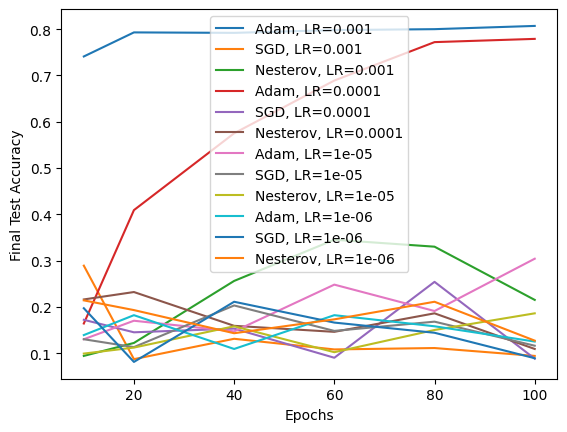

In [26]:
# Plotting accuracy vs. epochs for each learning rate and optimizer
for lr in learning_rates:
    for opt_name in optimizer_names:
        subset_df = results_df[(results_df['Learning Rate'] == lr) & (results_df['Optimizer'] == opt_name)]
        plt.plot(subset_df['Epochs'], subset_df['Final Test Accuracy'], label=f'{opt_name}, LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Final Test Accuracy')
plt.legend()
plt.show()

## Link Prediction



### Dataset preprocess

As shown in the following figure, link prediction is to predict whether two nodes in a graph have a link, which can be considered as a binary classification task. We will construct a link prediction dataset containing training, validation, and test set based on Cora.

<br/>
<center>
<img src="https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/01/link-prediction-graphical-neural-network-1024x576.webp?resize=1024%2C576&ssl=1" height="200" width="350"/>
</center>
<br/>




Given a graph, we divide the initial edge set into three distinct edge sets which represent the training, validation, and test set. Training set and validation set share a same graph structure. Test set contains some edges which does not exist in training and validation set to prevent data leakage.
<!-- Training set does not include edges in validation and test set, and the validation split does not include edges in the test split. Validation and test data should not be leaked into the training set. -->

Our model will be optimized on the training set. We can use `transforms` function in PyG to easily generate the data splits:

In [ ]:
transform = T.Compose([
    T.RandomLinkSplit(num_val=0.05,  # ratio of edges including in the validation set
                      num_test=0.2,  # ratio of edges including in the test set
                      is_undirected=True,
                      add_negative_train_samples=False),
])

Loading the Cora dataset:

In [ ]:
dataset = Planetoid('/tmp/cora', 'cora', transform=transform)

The data will be transformed from a data object to three tuples, where each element represents the corresponding split:

In [ ]:
train_data, val_data, test_data = dataset[0]

Now data object has two attributes of edge: `edge_index` and `edge_label_index`. `edge_index` denotes the graph structure used for performing message passing in GNN. `edge_label_index` denotes the edge index used to calculate loss in training set, or to evaluate the model in validation and test set.


Printing the statistics of data:

In [ ]:
print("Number of the nodes in training, validation and test data are", train_data.num_nodes, val_data.num_nodes, test_data.num_nodes)
print("Number of the edges in training, validation and test data are", train_data.num_edges, val_data.num_edges, test_data.num_edges)
print("Number of the edge_label_index in training, validation and test data are", train_data.edge_label_index.shape[1],
                                                                                  val_data.edge_label_index.shape[1],
                                                                                  test_data.edge_label_index.shape[1])

### Pipeline

We use the same GCN you constrcted.

In [ ]:
model = GCN(dataset.num_features, hidden_channels=128, out_channels=64)

In [ ]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

Similar as the what we do in the node classification task, we first apply the GCN model to produce the representation of each node in the graph. Usually we will use **inner product** to measure the similarity between two node representations to determine how likely it is for these two nodes to be connected.

#### Question 7 (5 points)

Following the instruction and implement the function to calculate the inner product:

In [ ]:
def compute_similarity(node_embs, edge_index):
    result = 0

    # TODO: Define similarity function.
    # 1. calculate the inner product between all the pairs in the edge_index
    # Note: the shape of node_embs is [n, h] where n is the number of nodes, and h is the embedding size
    # the shape of edge_index is [2, m] where m is the number of edges

    ############# Your code here ############
    ## (~1 line of code)
    #########################################

    return result

n, h = 5, 10  # number of nodes and embedding size
node_embs = torch.rand(n, h)
edge_index = torch.tensor([[0, 1, 2, 3],
                           [2, 3, 0, 1]])  # compute the similarity of (0, 2), (1, 3), (2, 0), (3, 1)
similarity = compute_similarity(node_embs, edge_index)
print("Similairty:", similarity)

We optimize the model by minimizing the loss function. Here we consider the link prediction task as a binary classification task (edge exists or no), and apply binary cross entropy loss:

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()

The edges in the graph will be taken as the positive examples with label=1 in the loss function. To prevent model from collapse, we usually will feed some **negative examples** to the loss function, which is the non-existing edges in the graph. The number of negative examples should equal to the number of positive ones.

With the help of PyG, we can easily perform the negative sampling. Here is an example:

In [ ]:
from torch_geometric.utils import negative_sampling

neg_edge_index = negative_sampling(
      edge_index=train_data.edge_index,  # positive edges in the graph
      num_nodes=train_data.num_nodes,  # number of nodes
      num_neg_samples=5,  # number of negative examples
    )

print("shape of neg_edge_index:", neg_edge_index.shape)  # [2, num_neg_samples]
print("negative examples:", neg_edge_index)

Positive examples (`edge_label_index`) will be assigned the label 1, and negative ones will be assigned the label 0. We can obtain the label of positive examples like this:

In [ ]:
print("positive examples' labels:", train_data.edge_label)

Now we can construct training and testing pipeline.

#### Question 8 (15 points)

Please follow the instruction and implement a function that trains a model.

In [ ]:
def train(model, data, optimizer, loss_fn):

    loss = 0

    # TODO: Define train function.
    # 1. put the model into train mode
    # 2. clear the gradients calculated from the last batch
    # 3. use 'edge_index' to get the node representation by model
    # 4. sample the negative examples with the same number of positive ones (edge_label_index)
    # 5. concatenate the positive edges and negative edges
    # 6. concatenate the labels of positive edges and negative edges
    # 7. calculate the similarity between two end nodes to determine the probability that the corresponding edge is present on the graph.
    # 8. feed the probability and edge label to the loss function
    # 9. calculate the gradients of each parameter
    # 10. update the parameters by taking an optimizer step

    ############# Your code here ############
    ## (~10 line of code)

    #########################################

    return loss

We usually use [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to evaluate the performance of model on binary classification task. The test function is as followed:

In [ ]:
from sklearn.metrics import roc_auc_score

@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)  # use `edge_index` to perform message passing
    out = compute_similarity(out, data.edge_label_index).view(-1).sigmoid()  # use `edge_label_index` to compute the loss
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

Now we can start to train our model based on `train` and `test` function:

In [ ]:
epochs = 50

best_val_auc = final_test_auc = 0
for epoch in range(1, epochs + 1):
    loss = train(model, train_data, optimizer, loss_fn)
    valid_auc = test(model, val_data)
    test_auc = test(model, test_data)
    if valid_auc > best_val_auc:
        best_val_auc = valid_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {valid_auc:.4f}, Test: {test_auc:.4f}')

## Graph classification task

Now let's have a closer look at the task of graph classification. Graph classification refers to the problem of classifiying entire graphs, given a dataset of graphs. Here, we will apply GNN to embed entire graphs.

### Dataset preprocess

One of the most common benchmark dataset of graph classification is [TUDatasets](https://chrsmrrs.github.io/datasets/) which are collected by TU Dortmund University. Each graph in this dataset is a molecule, and the task is to infer whether a molecule inhibits HIV virus replication or not. We can load this dataset by PyG. In this colab, we mainly focus on one of the smaller ones in TUDatasets: MUTAG dataset.

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/mutag', name='MUTAG')
print(dataset)

We can obtain its number of graphs, classes, node features:

In [ ]:
print(f'number of graphs: {len(dataset)}')
print(f'number of classes: {dataset.num_classes}')
print(f'Number of node features: {dataset.num_node_features}')

There 188 graphs in this dataset, and we can get the graph object with any id. For example:

In [ ]:
data = dataset[5]
print(f'5-th graph object: {data}')

We can obtain some statistics for each graph object:

In [ ]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

We will divide the dataset into training set and test set, and there is no duplicate graph in these two sets. We can randomly pick 150 graphs to form training set, and the remaining ones will be the test set:

In [ ]:
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

### Mini-batching of graphs

To fully utilize GPU, we will conduct mini-batch training which can be achieved by PyG. A batch of graphs will be grouped in a giant graph that holds multiple isolated subgraphs, and node features are simply concatenated. `dataloader` object in PyG can easily finish the aboved process:

In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Here is an example to show how dataloader works. We can observe that multiple graphs are included in a giant graph.

In [ ]:
for step, data in enumerate(train_loader):
    print(f'Step {step + 1}, number of graphs in the current batch: {data.num_graphs}')
    print(f'Step {step + 1}, number of nodes in the current batch: {data.num_nodes}')
    print(f'Step {step + 1}, the graph id to which each node belongs is: {data.batch}')
    print()

The graph id of every node to which it belongs is indicated by the `batch` attribute.

### Model Implementation

First we perform message passing to embed each node in the graph, then aggregate the node embeddings into a graph embedding by pooling method. Finally the graph embedding will be fed to a classifier to conduct graph classification.

We will apply mean pooling method which is to simply take the average of node embeddings. Here is an example of mean pooling:

In [ ]:
from torch_geometric.nn import global_mean_pool

x = torch.rand(5, 4)  # embeddings of 5 nodes

# graph id. The first two nodes belong to first graph,
# the 3rd node belongs to the second graph,
# and the last two nodes belong to the last graph
batch = torch.tensor([0, 0, 1, 2, 2])

x = global_mean_pool(x, batch)  # node embedding and the graph id to which each node belongs to
print(f"shape of graph embedding: {x.shape}")

#### Question 9 (15 points)

Follow the instructions and implement the GNN model for graph classifiation task.

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()

        # TODO: Define two GCNConv modules, a linear classifier and a ReLU function.
        # The input size and output size of first GCNConv module should be in_channels and hidden_channels
        # The input size and output size of second GCNConv module should be hidden_channels and hidden_channels
        # The input size and output size of Linear module should be hidden_channels and out_channels

        ############# Your code here ############
        ## (~4 line of code)

        #########################################

    def forward(self, x, edge_index, batch):

        output = None

        # TODO: Use the modules you define in __init__ to perform message passing.
        # ReLU function should be used in the middle of two GCNConv modules.
        # Apply global_mean_pool module to generate graph embeddings
        # Apply linear classifier to predict the label

        ############# Your code here ############
        ## (~3 line of code)

        #########################################
        return output

Initialize the model and the optimizer:

In [ ]:
model = GCN(in_channels=dataset.num_node_features, hidden_channels=64, out_channels=dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

### Pipeline

Here we use cross entropy loss to optimize:

In [ ]:
loss_func = torch.nn.CrossEntropyLoss()

#### Question 10 (15 points)

Now we are going to implement `train` function. Please follow the instrution:

In [ ]:
def train(model, loader, optimizer, loss_func):

    loss = 0

    # TODO: Define train function.
    # 1. put the model into train mode
    # 2. iterate over the dataloader
    # 3. obtain the predicted result by model
    # 4. compute the loss
    # 5. loss backward
    # 6. update the parameters by taking an optimizer step
    # 7. clear the gradients calculated from the last batch

    ############# Your code here ############
    ## (~7 line of code)
    #########################################

    return model

The `test` function is implemented as followed:

In [ ]:
def test(model, loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

Now we can train and evaluate our model on graph classification task:


In [ ]:
epochs = 100

for epoch in range(1, epochs):
    model = train(model, train_loader, optimizer, loss_func)
    test_acc = test(model, test_loader)
    print(f'Epoch: {epoch:03d}, Test Acc: {test_acc:.4f}')

## Submission

Make sure to run all the cells and save a copy of this colab in your driver. If you complete this notebook, download the colab and upload your work to canvas to submit it.